# Importando as bibliotecas utilizadas no projeto

In [39]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import plotly.express as plx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm

# Extraindo os Dados no site atraves da 'div class'

In [15]:
#código html extraído de: https://www.estadao.com.br/infograficos/politica,placar-votos-eleicao-presidente-camara-deputados-2021,1145650
html_votos = """<div class="custom-main"><div class="custom-section" data-party="PP"><h3 class="custom-section__title">Arthur Lira</h3><p class="custom-section__lead"><span class="custom-section__count">237 votos</span></p><div class="custom-section__representatives"><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204476.jpg" alt="Deputado Federal Chiquinho Brazão (Avante–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/198197.jpg" alt="Deputada Federal Greyce Elias (Avante–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204375.jpg" alt="Deputada Federal Leda Sadala (Avante–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160510.jpg" alt="Deputado Federal Luis Tibé (Avante–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178921.jpg" alt="Deputado Federal Sebastião Oliveira (Avante–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/197438.jpg" alt="Deputado Federal Tito (Avante–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178836.jpg" alt="Deputado Federal Alan Rick (DEM–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160600.jpg" alt="Deputado Federal Arthur Oliveira Maia (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178993.jpg" alt="Deputado Federal Carlos Henrique Gaguim (DEM–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204511.jpg" alt="Deputado Federal David Soares (DEM–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204412.jpg" alt="Deputado Federal Dr. Zacharias Calil (DEM–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178854.jpg" alt="Deputado Federal Elmar Nascimento (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92102.jpg" alt="Deputado Federal Leur Lomanto Júnior (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204381.jpg" alt="Deputado Federal Luis Miranda (DEM–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/66179.jpg" alt="Deputada Federal Norma Ayub (DEM–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74399.jpg" alt="Deputado Federal Onyx Lorenzoni (DEM–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204395.jpg" alt="Deputado Federal Pedro Lupion (DEM–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178901.jpg" alt="Deputada Federal Tereza Cristina (DEM–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204459.jpg" alt="Deputada Federal Daniela do Waguinho (MDB–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73692.jpg" alt="Deputado Federal Osmar Terra (MDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204413.jpg" alt="Deputado Federal Alcides Rodrigues (Patriota–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204518.jpg" alt="Deputado Federal Dr. Frederico (Patriota–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204494.jpg" alt="Deputado Federal Fred Costa (Patriota–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204566.jpg" alt="Deputado Federal Marreca Filho (Patriota–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160642.jpg" alt="Deputado Federal Pastor Eurico (Patriota–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178930.jpg" alt="Deputado Federal Roman (Patriota–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204575.jpg" alt="Deputado Federal Gil Cutrim (PDT–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204554.jpg" alt="Deputado Federal Abílio Santana (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141372.jpg" alt="Deputado Federal Aelton Freitas (PL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178937.jpg" alt="Deputado Federal Altineu Côrtes (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74052.jpg" alt="Deputado Federal Bosco Costa (PL–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178829.jpg" alt="Deputado Federal Capitão Augusto (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178924.jpg" alt="Deputado Federal Capitão Fábio Abreu (PL–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/135054.jpg" alt="Deputado Federal Cristiano Vale (PL–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204481.jpg" alt="Deputado Federal Dr. Jaziel (PL–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141417.jpg" alt="Deputado Federal Edio Lopes (PL–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204427.jpg" alt="Deputado Federal Fernando Rodolfo (PL–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204354.jpg" alt="Deputada Federal Flávia Arruda (PL–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/115746.jpg" alt="Deputado Federal Gelson Azevedo (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74383.jpg" alt="Deputado Federal Giacobo (PL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160673.jpg" alt="Deputado Federal Giovani Cherini (PL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141458.jpg" alt="Deputado Federal João Carlos Bacelar (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141459.jpg" alt="Deputado Federal João Maia (PL–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/214694.jpg" alt="Deputado Federal Jorge Goetten (PL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74554.jpg" alt="Deputado Federal José Rocha (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204550.jpg" alt="Deputado Federal Júnior Mano (PL–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74585.jpg" alt="Deputado Federal Lincoln Portela (PL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204485.jpg" alt="Deputado Federal Luiz Carlos Motta (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/162332.jpg" alt="Deputado Federal Luiz Nishimori (PL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/166402.jpg" alt="Deputada Federal Magda Mofatto (PL–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204556.jpg" alt="Deputado Federal Marcelo Ramos (PL–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178983.jpg" alt="Deputado Federal Marcio Alvino (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178985.jpg" alt="Deputado Federal Miguel Lombardi (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204570.jpg" alt="Deputado Federal Pastor Gil (PL–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204529.jpg" alt="Deputada Federal Policial Katia Sastre (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204567.jpg" alt="Deputado Federal Raimundo Costa (PL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204438.jpg" alt="Deputado Federal Sergio Toledo (PL–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178946.jpg" alt="Deputada Federal Soraya Santos (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204385.jpg" alt="Deputado Federal Valdevan Noventa (PL–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/137070.jpg" alt="Deputado Federal Vicentinho Júnior (PL–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160591.jpg" alt="Deputado Federal Vinicius Gurgel (PL–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74043.jpg" alt="Deputado Federal Wellington Roberto (PL–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204517.jpg" alt="Deputado Federal Zé Vitor (PL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/69871.jpg" alt="Deputado Federal Bacelar (PODE–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178929.jpg" alt="Deputado Federal Diego Garcia (PODE–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204472.jpg" alt="Deputado Federal José Medeiros (PODE–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204391.jpg" alt="Deputado Federal José Nelto (PODE–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178989.jpg" alt="Deputada Federal Renata Abreu (PODE–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178920.jpg" alt="Deputado Federal Ricardo Teobaldo (PODE–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160653.jpg" alt="Deputado Federal Roberto de Lucena (PODE–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/121948.jpg" alt="Deputado Federal Adriano do Baldy (PP–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/136811.jpg" alt="Deputado Federal Afonso Hamm (PP–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204549.jpg" alt="Deputado Federal AJ Albuquerque (PP–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178831.jpg" alt="Deputado Federal André Abdon (PP–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178882.jpg" alt="Deputado Federal André Fufuca (PP–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73696.jpg" alt="Deputada Federal Angela Amin (PP–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160541.jpg" alt="Deputado Federal Arthur Lira (PP–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74090.jpg" alt="Deputado Federal Átila Lins (PP–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74459.jpg" alt="Deputado Federal Átila Lira (PP–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178948.jpg" alt="Deputado Federal Beto Rosado (PP–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/93083.jpg" alt="Deputado Federal Cacá Leão (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204380.jpg" alt="Deputada Federal Celina Leão (PP–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204440.jpg" alt="Deputado Federal Christino Aureo (PP–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74537.jpg" alt="Deputado Federal Claudio Cajado (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160599.jpg" alt="Deputado Federal Dimas Fabiano (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204450.jpg" alt="Deputado Federal Dr. Luiz Antonio Teixeira Jr. (PP–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141421.jpg" alt="Deputado Federal Eduardo da Fonte (PP–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178871.jpg" alt="Deputado Federal Evair Vieira de Melo (PP–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/66828.jpg" alt="Deputado Federal Fausto Pinato (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92699.jpg" alt="Deputado Federal Fernando Monteiro (PP–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204510.jpg" alt="Deputado Federal Franco Cartafina (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204531.jpg" alt="Deputado Federal Guilherme Derrite (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160667.jpg" alt="Deputado Federal Guilherme Mussi (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178959.jpg" alt="Deputado Federal Hiran Gonçalves (PP–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/67138.jpg" alt="Deputada Federal Iracema Portella (PP–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/108338.jpg" alt="Deputada Federal Jaqueline Cassol (PP–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160570.jpg" alt="Deputado Federal Jerônimo Goergen (PP–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/151208.jpg" alt="Deputado Federal Laercio Oliveira (PP–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/146788.jpg" alt="Deputado Federal Marcelo Aro (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204430.jpg" alt="Deputada Federal Margarete Coelho (PP–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178858.jpg" alt="Deputado Federal Mário Negromonte Jr. (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/146307.jpg" alt="Deputado Federal Neri Geller (PP–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204406.jpg" alt="Deputado Federal Pedro Westphalen (PP–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204524.jpg" alt="Deputado Federal Pinheirinho (PP–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204390.jpg" alt="Deputado Federal Professor Alcides (PP–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73788.jpg" alt="Deputado Federal Ricardo Barros (PP–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160655.jpg" alt="Deputado Federal Ricardo Izar (PP–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178861.jpg" alt="Deputado Federal Ronaldo Carletto (PP–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204399.jpg" alt="Deputado Federal Schiavinato (PP–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204397.jpg" alt="Deputado Federal Boca Aberta (PROS–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204487.jpg" alt="Deputado Federal Capitão Wagner (PROS–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178939.jpg" alt="Deputada Federal Clarissa Garotinho (PROS–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160640.jpg" alt="Deputado Federal Eros Biondini (PROS–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/72442.jpg" alt="Deputado Federal Felipe Carreras (PSB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204405.jpg" alt="Deputada Federal Liziane Bayer (PSB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178881.jpg" alt="Deputado Federal Aluisio Mendes (PSC–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204423.jpg" alt="Deputado Federal André Ferreira (PSC–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74270.jpg" alt="Deputado Federal Gilberto Nascimento (PSC–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204419.jpg" alt="Deputado Federal Glaustin da Fokus (PSC–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160534.jpg" alt="Deputada Federal Lauriete (PSC–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204363.jpg" alt="Deputado Federal Osires Damaso (PSC–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204441.jpg" alt="Deputado Federal Otoni de Paula (PSC–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/193726.jpg" alt="Deputado Federal Paulo Eduardo Martins (PSC–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo custom-representative__avatar__photo--anon" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/outros-candidatos.png" alt="Deputado Federal Ricardo da Karol (PSC–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74471.jpg" alt="Deputado Federal André de Paula (PSD–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160553.jpg" alt="Deputado Federal Antonio Brito (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204504.jpg" alt="Deputado Federal Cezinha de Madureira (PSD–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/116379.jpg" alt="Deputado Federal Darci de Matos (PSD–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178908.jpg" alt="Deputado Federal Delegado Éder Mauro (PSD–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160588.jpg" alt="Deputado Federal Diego Andrade (PSD–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/143632.jpg" alt="Deputado Federal Domingos Neto (PSD–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204562.jpg" alt="Deputado Federal Edilázio Júnior (PSD–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178953.jpg" alt="Deputado Federal Expedito Netto (PSD–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141428.jpg" alt="Deputado Federal Fabio Faria (PSD–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178969.jpg" alt="Deputado Federal Fábio Mitidieri (PSD–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204447.jpg" alt="Deputada Federal Flordelis (PSD–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204392.jpg" alt="Deputado Federal Francisco Jr. (PSD–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204465.jpg" alt="Deputado Federal Haroldo Cathedral (PSD–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141450.jpg" alt="Deputado Federal Hugo Leal (PSD–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178910.jpg" alt="Deputado Federal Joaquim Passarinho (PSD–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160619.jpg" alt="Deputado Federal José Nunes (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74317.jpg" alt="Deputado Federal Júlio Cesar (PSD–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204497.jpg" alt="Deputado Federal Júnior Ferrari (PSD–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204522.jpg" alt="Deputado Federal Marco Bertaiolli (PSD–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178843.jpg" alt="Deputado Federal Marx Beltrão (PSD–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178895.jpg" alt="Deputado Federal Misael Varella (PSD–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74165.jpg" alt="Deputado Federal Neucimar Fraga (PSD–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204573.jpg" alt="Deputado Federal Otto Alencar Filho (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74574.jpg" alt="Deputado Federal Paulo Magalhães (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo custom-representative__avatar__photo--anon" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/outros-candidatos.png" alt="Deputado Federal Pedro Augusto (PSD–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/205865.jpg" alt="Deputado Federal Reinhold Stephanes Junior (PSD–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73808.jpg" alt="Deputado Federal Sérgio Brito (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204557.jpg" alt="Deputado Federal Sidney Leite (PSD–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92776.jpg" alt="Deputado Federal Stefano Aguiar (PSD–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204396.jpg" alt="Deputado Federal Vermelho (PSD–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204560.jpg" alt="Deputado Federal Adolfo Viana (PSDB–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204496.jpg" alt="Deputado Federal Celso Sabino (PSDB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204421.jpg" alt="Deputada Federal Edna Henrique (PSDB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160645.jpg" alt="Deputado Federal Luiz Carlos (PSDB–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204471.jpg" alt="Deputada Federal Mara Rocha (PSDB–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178912.jpg" alt="Deputado Federal Pedro Cunha Lima (PSDB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204357.jpg" alt="Deputada Federal Rose Modesto (PSDB–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204545.jpg" alt="Deputada Federal Alê Silva (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204400.jpg" alt="Deputada Federal Aline Sleutjes (PSL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204374.jpg" alt="Deputada Federal Bia Kicis (PSL–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204388.jpg" alt="Deputado Federal Bibo Nunes (PSL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204507.jpg" alt="Deputada Federal Carla Zambelli (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204460.jpg" alt="Deputado Federal Carlos Jordy (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204369.jpg" alt="Deputada Federal Caroline de Toni (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204462.jpg" alt="Deputada Federal Chris Tonietto (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204376.jpg" alt="Deputado Federal Coronel Armando (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204378.jpg" alt="Deputado Federal Coronel Chrisóstomo (PSL–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204514.jpg" alt="Deputado Federal Coronel Tadeu (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204367.jpg" alt="Deputado Federal Daniel Freitas (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204454.jpg" alt="Deputado Federal Daniel Silveira (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204451.jpg" alt="Deputado Federal Delegado Antônio Furtado (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204351.jpg" alt="Deputado Federal Dr. Luiz Ovando (PSL–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/81297.jpg" alt="Deputada Federal Dra. Soraya Manato (PSL–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92346.jpg" alt="Deputado Federal Eduardo Bolsonaro (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204411.jpg" alt="Deputado Federal Filipe Barros (PSL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204473.jpg" alt="Deputado Federal General Girão (PSL–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204513.jpg" alt="Deputado Federal Guiga Peixoto (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204444.jpg" alt="Deputado Federal Helio Lopes (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204520.jpg" alt="Deputado Federal Junio Amaral (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204547.jpg" alt="Deputado Federal Léo Motta (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/196358.jpg" alt="Deputado Federal Lourival Gomes (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204455.jpg" alt="Deputado Federal Luiz Lima (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204526.jpg" alt="Deputado Federal Luiz Philippe de Orleans e Bragança (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204458.jpg" alt="Deputada Federal Major Fabiana (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/179000.jpg" alt="Deputado Federal Marcelo Álvaro Antônio (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204452.jpg" alt="Deputado Federal Márcio Labre (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204449.jpg" alt="Deputado Federal Nelson Barbudo (PSL–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204479.jpg" alt="Deputado Federal Nicoletti (PSL–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204416.jpg" alt="Deputado Federal Sanderson (PSL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/179587.jpg" alt="Deputado Federal Vitor Hugo (PSL–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204410.jpg" alt="Deputada Federal Luisa Canziani (PTB–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/133810.jpg" alt="Deputado Federal Marcelo Moraes (PTB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204538.jpg" alt="Deputado Federal Paulo Bengtson (PTB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204353.jpg" alt="Deputada Federal Aline Gurgel (Republicanos–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204356.jpg" alt="Deputado Federal Amaro Neto (Republicanos–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204414.jpg" alt="Deputado Federal Aroldo Martins (Republicanos–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/109429.jpg" alt="Deputado Federal Benes Leocádio (Republicanos–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204572.jpg" alt="Deputado Federal Capitão Alberto Neto (Republicanos–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178962.jpg" alt="Deputado Federal Carlos Gomes (Republicanos–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73441.jpg" alt="Deputado Federal Celso Russomanno (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141408.jpg" alt="Deputado Federal Cleber Verde (Republicanos–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204491.jpg" alt="Deputado Federal Gilberto Abramo (Republicanos–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204373.jpg" alt="Deputado Federal Hélio Costa (Republicanos–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160674.jpg" alt="Deputado Federal Hugo Motta (Republicanos–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160531.jpg" alt="Deputado Federal Jhonatan de Jesus (Republicanos–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74366.jpg" alt="Deputado Federal João Campos (Republicanos–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204576.jpg" alt="Deputado Federal João Roma (Republicanos–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/205550.jpg" alt="Deputado Federal Jorge Braz (Republicanos–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204372.jpg" alt="Deputado Federal Julio Cesar Ribeiro (Republicanos–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/98057.jpg" alt="Deputado Federal Lafayette de Andrada (Republicanos–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204418.jpg" alt="Deputado Federal Luizão Goulart (Republicanos–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/150418.jpg" alt="Deputado Federal Márcio Marinho (Republicanos–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204506.jpg" alt="Deputado Federal Marcos Pereira (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204540.jpg" alt="Deputada Federal Maria Rosas (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/154178.jpg" alt="Deputado Federal Milton Vieira (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204422.jpg" alt="Deputado Federal Ossesio Silva (Republicanos–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160601.jpg" alt="Deputado Federal Pr. Marco Feliciano (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/152610.jpg" alt="Deputado Federal Roberto Alves (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178945.jpg" alt="Deputada Federal Rosangela Gomes (Republicanos–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204437.jpg" alt="Deputado Federal Severino Pessoa (Republicanos–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74356.jpg" alt="Deputado Federal Silas Câmara (Republicanos–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204425.jpg" alt="Deputado Federal Silvio Costa Filho (Republicanos–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204505.jpg" alt="Deputado Federal Vavá Martins (Republicanos–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141555.jpg" alt="Deputado Federal Vinicius Carvalho (Republicanos–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204551.jpg" alt="Deputado Federal Bosco Saraiva (Solidariedade–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204434.jpg" alt="Deputada Federal Dra. Vanda Milani (Solidariedade–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204364.jpg" alt="Deputado Federal Eli Borges (Solidariedade–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204408.jpg" alt="Deputado Federal Gustinho Ribeiro (Solidariedade–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204432.jpg" alt="Deputada Federal Marina Santos (Solidariedade–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204475.jpg" alt="Deputado Federal Ottaci Nascimento (Solidariedade–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/143084.jpg" alt="Deputado Federal Tiago Dimas (Solidariedade–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Arthur Lira"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160632.jpg" alt="Deputado Federal Zé Silva (Solidariedade–MG)" pinger-seen="true"></div></div></div></div><div class="custom-section" data-party="MDB"><h3 class="custom-section__title">Baleia Rossi</h3><p class="custom-section__lead"><span class="custom-section__count">133 votos</span></p><div class="custom-section__representatives"><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141391.jpg" alt="Deputado Federal Arnaldo Jardim (Cidadania–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178916.jpg" alt="Deputado Federal Daniel Coelho (Cidadania–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204433.jpg" alt="Deputado Federal Marcelo Calero (Cidadania–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73466.jpg" alt="Deputado Federal Rubens Bueno (Cidadania–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160545.jpg" alt="Deputado Federal Alexandre Leite (DEM–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74212.jpg" alt="Deputado Federal Aníbal Gomes (DEM–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141422.jpg" alt="Deputado Federal Efraim Filho (DEM–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160532.jpg" alt="Deputado Federal Eli Corrêa Filho (DEM–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204527.jpg" alt="Deputado Federal Geninho Zuliani (DEM–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204457.jpg" alt="Deputado Federal Juninho do Pneu (DEM–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/122158.jpg" alt="Deputado Federal Pedro Paulo (DEM–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160639.jpg" alt="Deputada Federal Professora Dorinha Seabra Rezende (DEM–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74693.jpg" alt="Deputado Federal Rodrigo Maia (DEM–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160559.jpg" alt="Deputado Federal Alceu Moreira (MDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178975.jpg" alt="Deputado Federal Baleia Rossi (MDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141401.jpg" alt="Deputado Federal Carlos Bezerra (MDB–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204361.jpg" alt="Deputado Federal Carlos Chiodini (MDB–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141405.jpg" alt="Deputado Federal Celso Maldaner (MDB–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178994.jpg" alt="Deputada Federal Dulce Miranda (MDB–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74075.jpg" alt="Deputada Federal Elcione Barbalho (MDB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/171623.jpg" alt="Deputado Federal Fabio Reis (MDB–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141434.jpg" alt="Deputado Federal Flaviano Melo (MDB–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178996.jpg" alt="Deputado Federal Giovani Feltes (MDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204539.jpg" alt="Deputado Federal Hercílio Coelho Diniz (MDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178981.jpg" alt="Deputado Federal Herculano Passos (MDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73772.jpg" alt="Deputado Federal Hermes Parcianello (MDB–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178884.jpg" alt="Deputado Federal Hildo Rocha (MDB–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204436.jpg" alt="Deputado Federal Isnaldo Bulhões Jr. (MDB–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/112437.jpg" alt="Deputado Federal João Marcelo Souza (MDB–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74079.jpg" alt="Deputado Federal José Priante (MDB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204474.jpg" alt="Deputado Federal Juarez Costa (MDB–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178954.jpg" alt="Deputado Federal Lucio Mosquini (MDB–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/179001.jpg" alt="Deputado Federal Márcio Biolchi (MDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204431.jpg" alt="Deputado Federal Marcos Aurélio Sampaio (MDB–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74749.jpg" alt="Deputado Federal Mauro Lopes (MDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178997.jpg" alt="Deputado Federal Moses Rodrigues (MDB–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141523.jpg" alt="Deputado Federal Raul Henry (MDB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178933.jpg" alt="Deputado Federal Sergio Souza (MDB–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204478.jpg" alt="Deputado Federal Vinicius Farah (MDB–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178952.jpg" alt="Deputado Federal Walter Alves (MDB–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74057.jpg" alt="Deputada Federal Alice Portugal (PCdoB–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74060.jpg" alt="Deputado Federal Daniel Almeida (PCdoB–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74848.jpg" alt="Deputada Federal Jandira Feghali (PCdoB–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/81055.jpg" alt="Deputado Federal Marcio Jerry (PCdoB–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178987.jpg" alt="Deputado Federal Orlando Silva (PCdoB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73943.jpg" alt="Deputada Federal Perpétua Almeida (PCdoB–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73801.jpg" alt="Deputado Federal Renildo Calheiros (PCdoB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178887.jpg" alt="Deputado Federal Rubens Pereira Junior (PCdoB–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178835.jpg" alt="Deputado Federal Afonso Motta (PDT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/133439.jpg" alt="Deputado Federal André Figueiredo (PDT–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141439.jpg" alt="Deputado Federal Chico D'Angelo (PDT–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141411.jpg" alt="Deputado Federal Dagoberto Nogueira (PDT–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204541.jpg" alt="Deputado Federal Eduardo Bismarck (PDT–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160666.jpg" alt="Deputado Federal Félix Mendonça Júnior (PDT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73460.jpg" alt="Deputado Federal Gustavo Fruet (PDT–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204435.jpg" alt="Deputado Federal Jesus Sérgio (PDT–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74158.jpg" alt="Deputado Federal Mário Heringer (PDT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204534.jpg" alt="Deputada Federal Tabata Amaral (PDT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/157130.jpg" alt="Deputado Federal Túlio Gadêlha (PDT–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74439.jpg" alt="Deputado Federal Wolney Queiroz (PDT–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160527.jpg" alt="Deputado Federal Aguinaldo Ribeiro (PP–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160511.jpg" alt="Deputado Federal Alessandro Molon (PSB–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204561.jpg" alt="Deputado Federal Bira do Pindaré (PSB–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204352.jpg" alt="Deputado Federal Camilo Capiberibe (PSB–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204542.jpg" alt="Deputado Federal Denis Bezerra (PSB–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204389.jpg" alt="Deputado Federal Elias Vaz (PSB–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204371.jpg" alt="Deputado Federal Felipe Rigoni (PSB–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204394.jpg" alt="Deputado Federal Gervásio Maia (PSB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74419.jpg" alt="Deputado Federal Gonzaga Patriota (PSB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178964.jpg" alt="Deputado Federal Heitor Schuch (PSB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/139285.jpg" alt="Deputada Federal Lídice da Mata (PSB–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204558.jpg" alt="Deputado Federal Marcelo Nilo (PSB–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141508.jpg" alt="Deputado Federal Mauro Nazif (PSB–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/92172.jpg" alt="Deputado Federal Milton Coelho (PSB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178951.jpg" alt="Deputado Federal Rafael Motta (PSB–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204530.jpg" alt="Deputado Federal Rodrigo Agostinho (PSB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178922.jpg" alt="Deputado Federal Tadeu Alencar (PSB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/206231.jpg" alt="Deputado Federal Ted Conti (PSB–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204483.jpg" alt="Deputado Federal Vilson da Fetaemg (PSB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204358.jpg" alt="Deputado Federal Beto Pereira (PSDB–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74262.jpg" alt="Deputado Federal Carlos Sampaio (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74655.jpg" alt="Deputado Federal Eduardo Barbosa (PSDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178977.jpg" alt="Deputado Federal Eduardo Cury (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141531.jpg" alt="Deputado Federal Rodrigo de Castro (PSDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178990.jpg" alt="Deputado Federal Samuel Moreira (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141553.jpg" alt="Deputado Federal Vanderlei Macris (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178992.jpg" alt="Deputado Federal Vitor Lippi (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204502.jpg" alt="Deputado Federal Bozzella (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/164359.jpg" alt="Deputado Federal Delegado Waldir (PSL–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204548.jpg" alt="Deputado Federal Heitor Freire (PSL–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74478.jpg" alt="Deputado Federal Luciano Bivar (PSL–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160508.jpg" alt="Deputado Federal Afonso Florence (PT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204495.jpg" alt="Deputado Federal Airton Faleiro (PT–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204501.jpg" alt="Deputado Federal Alencar Santana Braga (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204503.jpg" alt="Deputado Federal Alexandre Padilha (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73433.jpg" alt="Deputado Federal Arlindo Chinaglia (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73701.jpg" alt="Deputada Federal Benedita da Silva (PT–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141335.jpg" alt="Deputado Federal Beto Faro (PT–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160538.jpg" alt="Deputado Federal Bohn Gass (PT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204426.jpg" alt="Deputado Federal Carlos Veras (PT–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141398.jpg" alt="Deputado Federal Carlos Zarattini (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/132504.jpg" alt="Deputado Federal Enio Verri (PT–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160575.jpg" alt="Deputada Federal Erika Kokay (PT–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204393.jpg" alt="Deputado Federal Frei Anastacio Ribeiro (PT–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/107283.jpg" alt="Deputada Federal Gleisi Hoffmann (PT–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178970.jpg" alt="Deputado Federal João Daniel (PT–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178857.jpg" alt="Deputado Federal Jorge Solla (PT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141470.jpg" alt="Deputado Federal José Guimarães (PT–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204555.jpg" alt="Deputado Federal José Ricardo (PT–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/209189.jpg" alt="Deputado Federal Joseildo Ramos (PT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178825.jpg" alt="Deputado Federal Leo de Brito (PT–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74156.jpg" alt="Deputado Federal Leonardo Monteiro (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74398.jpg" alt="Deputada Federal Maria do Rosário (PT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204428.jpg" alt="Deputada Federal Marília Arraes (PT–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/188097.jpg" alt="Deputado Federal Merlong Solano (PT–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178986.jpg" alt="Deputado Federal Nilto Tatto (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74159.jpg" alt="Deputado Federal Odair Cunha (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74160.jpg" alt="Deputado Federal Patrus Ananias (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/171617.jpg" alt="Deputado Federal Paulão (PT–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141488.jpg" alt="Deputado Federal Paulo Teixeira (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204467.jpg" alt="Deputada Federal Professora Rosa Neide (PT–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74161.jpg" alt="Deputado Federal Reginaldo Lopes (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178925.jpg" alt="Deputada Federal Rejane Dias (PT–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74371.jpg" alt="Deputado Federal Rubens Otoni (PT–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73604.jpg" alt="Deputado Federal Rui Falcão (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160610.jpg" alt="Deputado Federal Valmir Assunção (PT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74283.jpg" alt="Deputado Federal Vicentinho (PT–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160569.jpg" alt="Deputado Federal Waldenor Pereira (PT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204488.jpg" alt="Deputado Federal Célio Studart (PV–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204537.jpg" alt="Deputado Federal Enrico Misasi (PV–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204383.jpg" alt="Deputado Federal Professor Israel Batista (PV–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204468.jpg" alt="Deputada Federal Joenia Wapichana (REDE–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Baleia Rossi"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141518.jpg" alt="Deputado Federal Paulo Pereira da Silva (Solidariedade–SP)" pinger-seen="true"></div></div></div></div><div class="custom-section"><h3 class="custom-section__title">Outros candidatos</h3><p class="custom-section__lead"><span class="custom-section__count">22 votos</span></p><div class="custom-graph__legend"><div class="custom-section__candidates custom-graph__legend__candidates"><div class="custom-candidate" data-party="PSOL"><div class="custom-candidate__avatar"><img class="custom-candidate__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/luiza-erundina.png" alt="Deputada Federal Luiza Erundina (PSOL–SP)" pinger-seen="true"><span class="custom-candidate__avatar__label">PSOL–SP</span></div><div class="custom-candidate__votes">9 votos</div><div class="custom-candidate__name">Luiza<br>Erundina</div></div><div class="custom-candidate" data-party="NOVO"><div class="custom-candidate__avatar"><img class="custom-candidate__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/van-hattem.png" alt="Deputado Federal Van Hattem (NOVO–RS)" pinger-seen="true"><span class="custom-candidate__avatar__label">NOVO–RS</span></div><div class="custom-candidate__votes">8 votos</div><div class="custom-candidate__name">Van<br>Hattem</div></div><div class="custom-candidate" data-party="MDB"><div class="custom-candidate__avatar"><img class="custom-candidate__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/fabio-ramalho.png" alt="Deputado Federal Fábio Ramalho (MDB–MG)" pinger-seen="true"><span class="custom-candidate__avatar__label">MDB–MG</span></div><div class="custom-candidate__votes">2 votos</div><div class="custom-candidate__name">Fábio<br>Ramalho</div></div><div class="custom-candidate" data-party="PSDB"><div class="custom-candidate__avatar"><img class="custom-candidate__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/alexandre-frota.png" alt="Deputado Federal Alexandre Frota (PSDB–SP)" pinger-seen="true"><span class="custom-candidate__avatar__label">PSDB–SP</span></div><div class="custom-candidate__votes">1 voto</div><div class="custom-candidate__name">Alexandre<br>Frota</div></div><div class="custom-candidate" data-party="Avante"><div class="custom-candidate__avatar"><img class="custom-candidate__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/andre-janones.png" alt="Deputado Federal André Janones (Avante–MG)" pinger-seen="true"><span class="custom-candidate__avatar__label">Avante–MG</span></div><div class="custom-candidate__votes">1 voto</div><div class="custom-candidate__name">André<br>Janones</div></div><div class="custom-candidate" data-party="PSL"><div class="custom-candidate__avatar"><img class="custom-candidate__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/general-peternelli.png" alt="Deputado Federal General Peternelli (PSL–SP)" pinger-seen="true"><span class="custom-candidate__avatar__label">PSL–SP</span></div><div class="custom-candidate__votes">1 voto</div><div class="custom-candidate__name">General<br>Peternelli</div></div></div></div><div class="custom-section__representatives"><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204509.jpg" alt="Deputada Federal Áurea Carolina (PSOL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204407.jpg" alt="Deputada Federal Fernanda Melchionna (PSOL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/152605.jpg" alt="Deputado Federal Glauber Braga (PSOL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73531.jpg" alt="Deputado Federal Ivan Valente (PSOL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74784.jpg" alt="Deputada Federal Luiza Erundina (PSOL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/76874.jpg" alt="Deputado Federal Marcelo Freixo (PSOL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204535.jpg" alt="Deputada Federal Sâmia Bomfim (PSOL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204464.jpg" alt="Deputada Federal Talíria Petrone (PSOL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Luiza Erundina"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo custom-representative__avatar__photo--anon" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/outros-candidatos.png" alt="Deputada Federal Vivi Reis (PSOL–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204528.jpg" alt="Deputada Federal Adriana Ventura (NOVO–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204516.jpg" alt="Deputado Federal Alexis Fonteyne (NOVO–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204365.jpg" alt="Deputado Federal Gilson Marques (NOVO–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204523.jpg" alt="Deputado Federal Lucas Gonzalez (NOVO–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/156190.jpg" alt="Deputado Federal Marcel van Hattem (NOVO–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204461.jpg" alt="Deputado Federal Paulo Ganime (NOVO–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204519.jpg" alt="Deputado Federal Tiago Mitraud (NOVO–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Van Hattem"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204532.jpg" alt="Deputado Federal Vinicius Poit (NOVO–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Fábio Ramalho"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141427.jpg" alt="Deputado Federal Fábio Ramalho (MDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Fábio Ramalho"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73586.jpg" alt="Deputado Federal Júlio Delgado (PSB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Alexandre Frota"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204544.jpg" alt="Deputado Federal Alexandre Frota (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="André Janones"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204515.jpg" alt="Deputado Federal André Janones (Avante–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="General Peternelli"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204484.jpg" alt="Deputado Federal General Peternelli (PSL–SP)" pinger-seen="true"></div></div></div></div><div class="custom-section custom-section--no-answer"><h3 class="custom-section__title">Não responderam</h3><p class="custom-section__lead"><span class="custom-section__count">111 deputados</span></p><div class="custom-section__representatives"><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204553.jpg" alt="Deputado Federal Pastor Sargento Isidório (Avante–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178972.jpg" alt="Deputado Federal Alex Manente (Cidadania–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/164360.jpg" alt="Deputada Federal Carmen Zanotto (Cidadania–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204355.jpg" alt="Deputado Federal Da Vitoria (Cidadania–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204377.jpg" alt="Deputada Federal Paula Belmonte (Cidadania–DF)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141513.jpg" alt="Deputado Federal Bilac Pinto (DEM–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141431.jpg" alt="Deputado Federal Fernando Coelho Filho (DEM–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178909.jpg" alt="Deputado Federal Hélio Leite (DEM–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204386.jpg" alt="Deputado Federal Jose Mario Schreiner (DEM–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178886.jpg" alt="Deputado Federal Juscelino Filho (DEM–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204536.jpg" alt="Deputado Federal Kim Kataguiri (DEM–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204498.jpg" alt="Deputado Federal Olival Marques (DEM–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178860.jpg" alt="Deputado Federal Paulo Azi (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178947.jpg" alt="Deputado Federal Sóstenes Cavalcante (DEM–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204456.jpg" alt="Deputado Federal Gutemberg Reis (MDB–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178839.jpg" alt="Deputada Federal Jéssica Sales (MDB–AC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178896.jpg" alt="Deputado Federal Newton Cardoso Jr (MDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160641.jpg" alt="Deputada Federal Professora Marcivania (PCdoB–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204571.jpg" alt="Deputado Federal Alex Santana (PDT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74467.jpg" alt="Deputado Federal Damião Feliciano (PDT–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/68720.jpg" alt="Deputado Federal Fábio Henrique (PDT–SE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160598.jpg" alt="Deputada Federal Flávia Morais (PDT–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/191923.jpg" alt="Deputado Federal Flávio Nogueira (PDT–PI)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204533.jpg" alt="Deputado Federal Idilvan Alencar (PDT–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74299.jpg" alt="Deputado Federal Leônidas Cristino (PDT–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/133968.jpg" alt="Deputado Federal Paulo Ramos (PDT–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73486.jpg" alt="Deputado Federal Pompeo de Mattos (PDT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204489.jpg" alt="Deputado Federal Robério Monteiro (PDT–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204360.jpg" alt="Deputada Federal Silvia Cristina (PDT–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/177282.jpg" alt="Deputado Federal Subtenente Gonzaga (PDT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178928.jpg" alt="Deputada Federal Christiane de Souza Yared (PL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/129618.jpg" alt="Deputada Federal Gorete Pereira (PL–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204563.jpg" alt="Deputado Federal Josimar Maranhãozinho (PL–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204574.jpg" alt="Deputado Federal Junior Lourenço (PL–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160558.jpg" alt="Deputado Federal Paulo Freire Costa (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160976.jpg" alt="Deputado Federal Tiririca (PL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204508.jpg" alt="Deputado Federal Igor Timo (PODE–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo custom-representative__avatar__photo--anon" loading="lazy" src="https://arte.estadao.com.br/public/pages/dn/gz/q7/0e/o2/40/outros-candidatos.png" alt="Deputado Federal Josivaldo JP (PODE–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204359.jpg" alt="Deputado Federal Léo Moraes (PODE–RO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178934.jpg" alt="Deputado Federal Toninho Wandscheer (PROS–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178863.jpg" alt="Deputado Federal Uldurico Junior (PROS–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160518.jpg" alt="Deputado Federal Weliton Prado (PROS–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178927.jpg" alt="Deputado Federal Aliel Machado (PSB–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204499.jpg" alt="Deputado Federal Cássio Andrade (PSB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160528.jpg" alt="Deputado Federal Danilo Cabral (PSB–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178931.jpg" alt="Deputado Federal Luciano Ducci (PSB–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/213274.jpg" alt="Deputado Federal Ricardo Silva (PSB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204366.jpg" alt="Deputado Federal Rodrigo Coelho (PSB–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204525.jpg" alt="Deputada Federal Rosana Valle (PSB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204482.jpg" alt="Deputado Federal Euclydes Pettersen (PSC–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/205476.jpg" alt="Deputado Federal Charles Fernandes (PSD–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160552.jpg" alt="Deputado Federal Danrlei de Deus Hinterholz (PSD–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160587.jpg" alt="Deputado Federal Fábio Trad (PSD–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204362.jpg" alt="Deputado Federal Ricardo Guidi (PSD–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204387.jpg" alt="Deputado Federal Sargento Fahur (PSD–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74646.jpg" alt="Deputado Federal Aécio Neves (PSDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160589.jpg" alt="Deputada Federal Bruna Furlan (PSDB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178876.jpg" alt="Deputado Federal Célio Silveira (PSDB–GO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204409.jpg" alt="Deputado Federal Daniel Trzeciak (PSDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/62881.jpg" alt="Deputado Federal Danilo Forte (PSDB–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160758.jpg" alt="Deputado Federal Domingos Sávio (PSDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178966.jpg" alt="Deputada Federal Geovania de Sá (PSDB–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204404.jpg" alt="Deputado Federal Lucas Redecker (PSDB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74352.jpg" alt="Deputado Federal Nilson Pinto (PSDB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141516.jpg" alt="Deputado Federal Paulo Abi-Ackel (PSDB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178844.jpg" alt="Deputado Federal Pedro Vilela (PSDB–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160635.jpg" alt="Deputado Federal Ruy Carneiro (PSDB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178961.jpg" alt="Deputada Federal Shéridan (PSDB–RR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204466.jpg" alt="Deputada Federal Tereza Nelma (PSDB–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204521.jpg" alt="Deputado Federal Abou Anni (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204490.jpg" alt="Deputado Federal Charlles Evangelista (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204512.jpg" alt="Deputado Federal Delegado Marcelo Freitas (PSL–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204569.jpg" alt="Deputado Federal Delegado Pablo (PSL–AM)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204368.jpg" alt="Deputado Federal Fabio Schiochet (PSL–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204477.jpg" alt="Deputado Federal Felício Laterça (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204398.jpg" alt="Deputado Federal Felipe Francischini (PSL–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204442.jpg" alt="Deputado Federal Gurgel (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204546.jpg" alt="Deputada Federal Joice Hasselmann (PSL–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204420.jpg" alt="Deputado Federal Julian Lemos (PSL–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204382.jpg" alt="Deputado Federal Loester Trutis (PSL–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204415.jpg" alt="Deputado Federal Nereu Crispim (PSL–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204446.jpg" alt="Deputado Federal Professor Joziel (PSL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204565.jpg" alt="Deputada Federal Professora Dayane Pimentel (PSL–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/205548.jpg" alt="Deputado Federal David Miranda (PSOL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178873.jpg" alt="Deputado Federal Helder Salomão (PT–ES)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/73482.jpg" alt="Deputado Federal Henrique Fontana (PT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160535.jpg" alt="Deputado Federal Marcon (PT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204453.jpg" alt="Deputada Federal Natália Bonavides (PT–RN)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160556.jpg" alt="Deputado Federal Padre João (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204492.jpg" alt="Deputado Federal Paulo Guedes (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74400.jpg" alt="Deputado Federal Paulo Pimenta (PT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160604.jpg" alt="Deputado Federal Pedro Uczai (PT–SC)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204480.jpg" alt="Deputado Federal Rogério Correia (PT–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74376.jpg" alt="Deputado Federal Vander Loubet (PT–MS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178889.jpg" alt="Deputado Federal Zé Carlos (PT–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204559.jpg" alt="Deputado Federal Zé Neto (PT–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160592.jpg" alt="Deputado Federal Zeca Dirceu (PT–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204500.jpg" alt="Deputado Federal Eduardo Costa (PTB–PA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/198783.jpg" alt="Deputado Federal Emanuel Pinheiro Neto (PTB–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/75431.jpg" alt="Deputado Federal Maurício Dziedricki (PTB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/194260.jpg" alt="Deputado Federal Nivaldo Albuquerque (PTB–AL)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/90201.jpg" alt="Deputado Federal Pedro Augusto Bezerra (PTB–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/122974.jpg" alt="Deputado Federal Pedro Lucas Fernandes (PTB–MA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/90842.jpg" alt="Deputado Federal Santini (PTB–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74044.jpg" alt="Deputado Federal Wilson Santiago (PTB–PB)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178832.jpg" alt="Deputada Federal Leandre (PV–PR)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160665.jpg" alt="Deputado Federal Augusto Coutinho (Solidariedade–PE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160512.jpg" alt="Deputado Federal Aureo Ribeiro (Solidariedade–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204439.jpg" alt="Deputado Federal Dr. Leonardo (Solidariedade–MT)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/160669.jpg" alt="Deputado Federal Genecias Noronha (Solidariedade–CE)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não quis responder"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178879.jpg" alt="Deputado Federal Lucas Vergilio (Solidariedade–GO)" pinger-seen="true"></div></div></div></div><div class="custom-section custom-section--not-found"><h3 class="custom-section__title">Não encontrados</h3><p class="custom-section__lead"><span class="custom-section__count">10 deputados</span></p><div class="custom-section__representatives"><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204564.jpg" alt="Deputado Federal Igor Kannário (DEM–BA)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204403.jpg" alt="Deputado Federal Marlon Santos (PDT–RS)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204448.jpg" alt="Deputado Federal Luiz Antônio Corrêa (PL–RJ)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204379.jpg" alt="Deputado Federal Acácio Favacho (PROS–AP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/195866.jpg" alt="Deputado Federal Vaidon Oliveira (PROS–CE)" pinger-seen="true"></div></div><div class="custom-representative custom-representative--notes" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/161550.jpg" alt="Deputado Federal Emidinho Madeira (PSB–MG)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/74273.jpg" alt="Deputado Federal Jefferson Campos (PSB–SP)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/178956.jpg" alt="Deputada Federal Mariana Carvalho (PSDB–RO)" pinger-seen="true"></div></div><div class="custom-representative custom-representative--notes" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/204370.jpg" alt="Deputado Federal Célio Moura (PT–TO)" pinger-seen="true"></div></div><div class="custom-representative" data-choice="Não foi encontrado"><div class="custom-representative__avatar"><img class="custom-representative__avatar__photo" loading="lazy" src="https://arte.estadao.com.br/public/placar/img/voter/141464.jpg" alt="Deputado Federal José Airton Félix Cirilo (PT–CE)" pinger-seen="true"></div></div></div></div></div>"""

In [16]:
soup = BeautifulSoup(html_votos, 'html.parser')

In [17]:
votos = []
for deputado in soup.find_all("div", attrs={"class": "custom-representative"}):
    dados_deputado = []
    dados_deputado.append(deputado['data-choice']) #voto
    resultado_busca_nome = re.search(r'.*Federal (.*)\((.*?)–(.*?)\)',deputado.img['alt'])
    dados_deputado.append(resultado_busca_nome.group(1)) #nome
    dados_deputado.append(resultado_busca_nome.group(2)) #partido
    dados_deputado.append(resultado_busca_nome.group(3)) #estado
    dados_deputado.append(deputado.img['src']) #link
    votos.append(dados_deputado) 

# Transformando os dados extraidos do site em um Dataframe

In [18]:
dados_eleicao_df = pd.DataFrame(votos)
dados_eleicao_df = dados_eleicao_df.rename(columns={0:'Voto', 1: 'Deputado', 2: 'Partido', 3: 'Estado'})

In [19]:
dados_eleicao_df = dados_eleicao_df[['Voto', 'Deputado', 'Partido', 'Estado']]
dados_eleicao_df

,Voto,Deputado,Partido,Estado
0,Arthur Lira,Chiquinho Brazão,Avante,RJ
1,Arthur Lira,Greyce Elias,Avante,MG
2,Arthur Lira,Leda Sadala,Avante,AP
3,Arthur Lira,Luis Tibé,Avante,MG
4,Arthur Lira,Sebastião Oliveira,Avante,PE
...,...,...,...,...
508,Não foi encontrado,Emidinho Madeira,PSB,MG
509,Não foi encontrado,Jefferson Campos,PSB,SP
510,Não foi encontrado,Mariana Carvalho,PSDB,RO
511,Não foi encontrado,Célio Moura,PT,TO


# Exportando os dados extraidos para um arquivo CSV

In [20]:
dados_eleicao_df.to_csv('dados_eleicao-camara.csv')

# Pegando as informações de quantos deputados cada partido tem

In [21]:
qt_dep_partido = dados_eleicao_df['Partido'].value_counts()
qt_dep_partido = qt_dep_partido.to_frame()
qt_dep_partido = qt_dep_partido.reset_index()
qt_dep_partido = qt_dep_partido.rename(columns={'index':'Partido', 'Partido':'Quantidade'})
qt_dep_partido

,Partido,Quantidade
0,PT,52
1,PSL,52
2,PL,43
3,PP,40
4,PSD,36
5,MDB,33
6,Republicanos,31
7,DEM,31
8,PSDB,31
9,PSB,30


In [22]:
grafico_partido = plx.pie(qt_dep_partido, names='Partido', values='Quantidade')
grafico_partido.show()

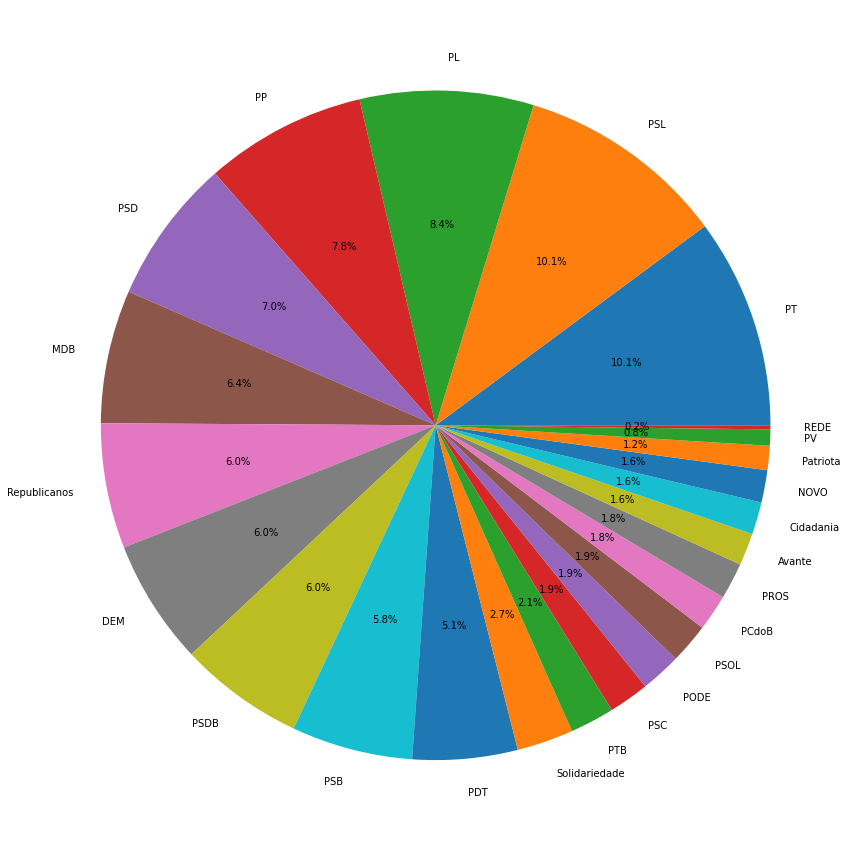

In [23]:
plt.figure(figsize=(15,120))
plt.pie(qt_dep_partido['Quantidade'], labels = qt_dep_partido['Partido'],autopct='%1.1f%%')
plt.show()

# Pegando informações de quantos votos cada candidato obteve

In [24]:
numero_voto = dados_eleicao_df['Voto'].value_counts()
numero_voto = numero_voto.to_frame()
numero_voto

,Voto
Arthur Lira,237
Baleia Rossi,133
Não quis responder,111
Não foi encontrado,10
Luiza Erundina,9
Van Hattem,8
Fábio Ramalho,2
Alexandre Frota,1
André Janones,1
General Peternelli,1


In [25]:
grafico_barra = plx.bar(dados_eleicao_df,x= dados_eleicao_df['Voto'], color=dados_eleicao_df['Voto'])
grafico_barra

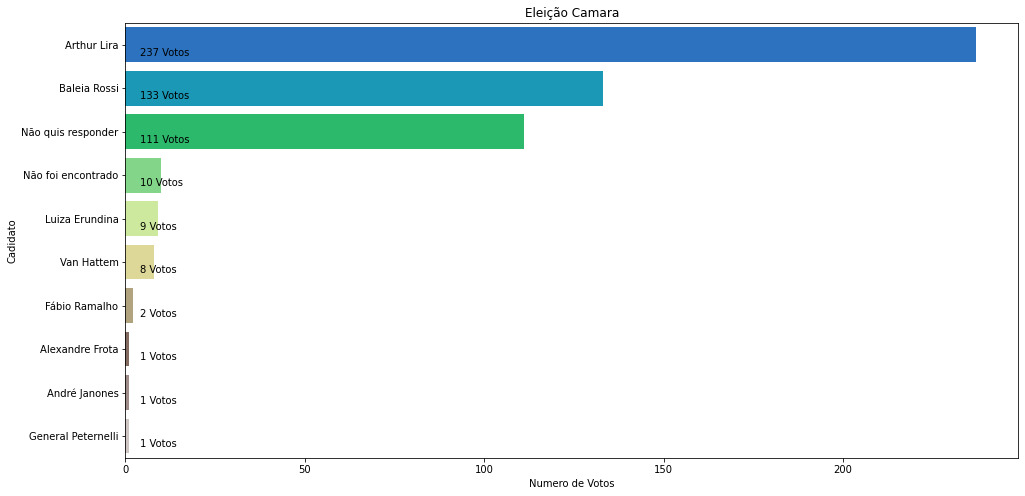

In [76]:


plt.figure(figsize=(16,8))
sns.barplot(x = numero_voto['Voto'],y =numero_voto.index,orient='h', palette='terrain')


for i in range(len(numero_voto.index)):
    
    plt.text(4.0, 
             i + 0.25, 
             str(numero_voto['Voto'][numero_voto.index[i]]) + " Votos")   
    
    



plt.ylabel('Cadidato')
plt.xlabel('Numero de Votos')
plt.title('Eleição Camara')
plt.show()



In [26]:
grafico_pizza = plx.pie(dados_eleicao_df, names='Voto')
grafico_pizza

# Pegando informações dos 3 maiores partidos da camara dos deputados

## Pegando informações do PT

In [27]:
pt_df = dados_eleicao_df.loc[dados_eleicao_df['Partido'] == 'PT']
pt_df

,Voto,Deputado,Partido,Estado
328,Baleia Rossi,Afonso Florence,PT,BA
329,Baleia Rossi,Airton Faleiro,PT,PA
330,Baleia Rossi,Alencar Santana Braga,PT,SP
331,Baleia Rossi,Alexandre Padilha,PT,SP
332,Baleia Rossi,Arlindo Chinaglia,PT,SP
333,Baleia Rossi,Benedita da Silva,PT,RJ
334,Baleia Rossi,Beto Faro,PT,PA
335,Baleia Rossi,Bohn Gass,PT,RS
336,Baleia Rossi,Carlos Veras,PT,PE
337,Baleia Rossi,Carlos Zarattini,PT,SP


In [28]:
grafico_pt = plx.pie(pt_df, names='Voto')
grafico_pt

In [ ]:
plt.figure(figsize=(15,120))
plt.pie(qt_dep_partido['Quantidade'], labels = qt_dep_partido['Partido'],autopct='%1.1f%%')
plt.show()

In [83]:
votos_df = pt_df['Voto'].value_counts()
votos_df = votos_df.to_frame()
votos_df

,Voto
Baleia Rossi,37
Não quis responder,13
Não foi encontrado,2


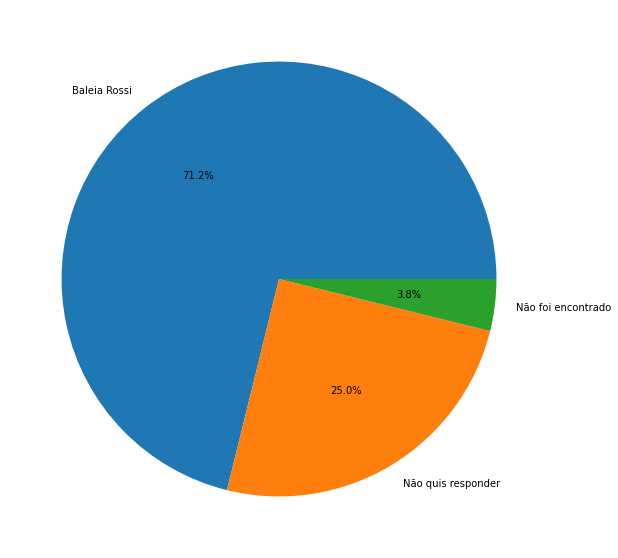

In [90]:

plt.figure(figsize=(15,10))
plt.pie(votos_df['Voto'],labels=votos_df.index,autopct='%1.1f%%')
plt.show()

## Pegando informações do PSL

In [29]:
psl_df = dados_eleicao_df.loc[dados_eleicao_df['Partido'] == 'PSL']
psl_df

,Voto,Deputado,Partido,Estado
162,Arthur Lira,Alê Silva,PSL,MG
163,Arthur Lira,Aline Sleutjes,PSL,PR
164,Arthur Lira,Bia Kicis,PSL,DF
165,Arthur Lira,Bibo Nunes,PSL,RS
166,Arthur Lira,Carla Zambelli,PSL,SP
167,Arthur Lira,Carlos Jordy,PSL,RJ
168,Arthur Lira,Caroline de Toni,PSL,SC
169,Arthur Lira,Chris Tonietto,PSL,RJ
170,Arthur Lira,Coronel Armando,PSL,SC
171,Arthur Lira,Coronel Chrisóstomo,PSL,RO


In [91]:
votos_df = psl_df['Voto'].value_counts()
votos_df = votos_df.to_frame()
votos_df

,Voto
Arthur Lira,33
Não quis responder,14
Baleia Rossi,4
General Peternelli,1


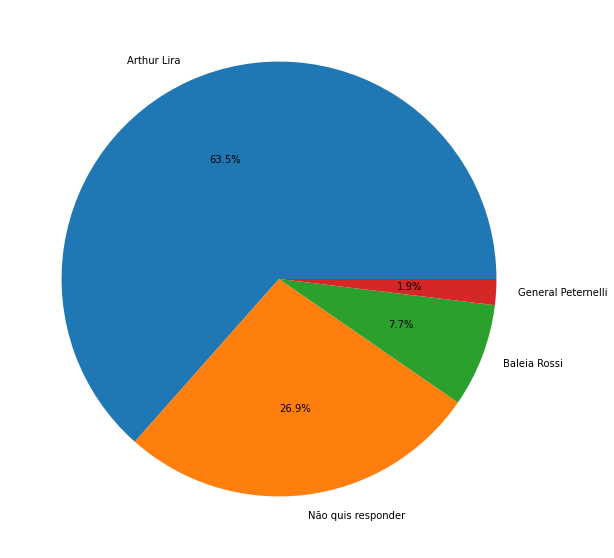

In [92]:

plt.figure(figsize=(15,10))
plt.pie(votos_df['Voto'],labels=votos_df.index,autopct='%1.1f%%')
plt.show()

In [30]:
grafico_psl = plx.pie(psl_df, names='Voto')
grafico_psl

## Pegando informações do PL

In [31]:
pl_df = dados_eleicao_df.loc[dados_eleicao_df['Partido'] == 'PL']
pl_df

,Voto,Deputado,Partido,Estado
27,Arthur Lira,Abílio Santana,PL,BA
28,Arthur Lira,Aelton Freitas,PL,MG
29,Arthur Lira,Altineu Côrtes,PL,RJ
30,Arthur Lira,Bosco Costa,PL,SE
31,Arthur Lira,Capitão Augusto,PL,SP
32,Arthur Lira,Capitão Fábio Abreu,PL,PI
33,Arthur Lira,Cristiano Vale,PL,PA
34,Arthur Lira,Dr. Jaziel,PL,CE
35,Arthur Lira,Edio Lopes,PL,RR
36,Arthur Lira,Fernando Rodolfo,PL,PE


In [93]:
votos_df = pl_df['Voto'].value_counts()
votos_df = votos_df.to_frame()
votos_df

,Voto
Arthur Lira,36
Não quis responder,6
Não foi encontrado,1


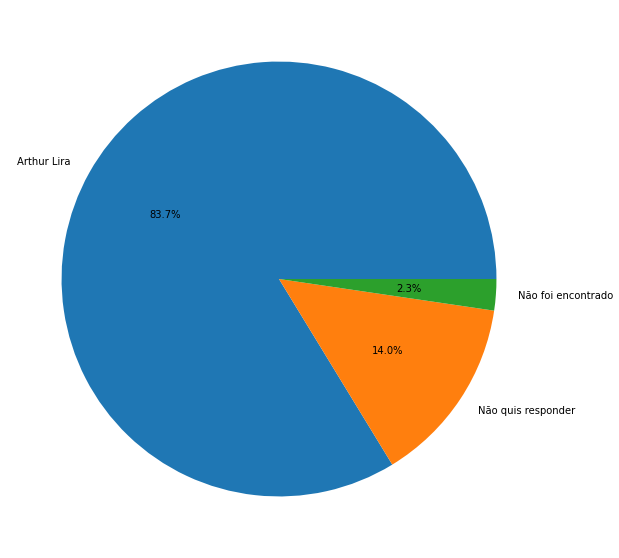

In [94]:

plt.figure(figsize=(15,10))
plt.pie(votos_df['Voto'],labels=votos_df.index,autopct='%1.1f%%')
plt.show()

In [32]:
grafico_pl = plx.pie(pl_df, names='Voto')

In [33]:
display(grafico_pl)